------
# **Dementia Patients -- Analysis and Prediction**
### ***Author : Akhilesh Vyas***
### ****Date : August, 2019****



# ***Result Plots***

- <a href='#00'>0. Setup </a>
    - <a href='#00.1'>0.1. Load libraries </a>
    - <a href='#00.2'>0.2. Define paths </a>

- <a href='#01'>1. Data Preparation </a>  
    - <a href='#01.1'>1.1. Read Data </a> 
    - <a href='#01.2'>1.2. Prepare data  </a>
    - <a href='#01.3'>1.3. Prepare target </a>
    - <a href='#01.4'>1.4. Removing Unwanted Features </a>
    
- <a href='#02'>2. Data Analysis</a> 
    - <a href='#02.1'>2.1. Feature </a> 
    - <a href='#02.2'>2.2. Target </a> 
    
- <a href='#03'>3. Data Preparation and Vector Transformation</a>

- <a href='#04'>4. Analysis and Imputing Missing Values </a>

- <a href='#05'>5. Feature Analysis</a> 
    - <a href='#05.1'>5.1. Correlation Matrix</a>
    - <a href='#05.2'>5.2. Feature and target </a>
    - <a href='#05.3'>5.3. Feature Selection Models </a>
    
- <a href='#06'>6.Machine Learning -Classification Model</a> 

# <a id='00'>0. Setup </a>

# <a id='00.1'>0.1 Load libraries </a>

Loading Libraries

In [1]:
import numpy as np
import pickle
import scipy.stats as spstats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.datasets.base import Bunch
from data_transformation_cls import FeatureTransform
from ast import literal_eval
import plotly.figure_factory as ff
import plotly.offline as py

import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


%matplotlib inline

# <a id='00.2'>0.2 Define paths </a>

In [2]:
# data_path
data_path = '../../../datalcdem/data/optima/dementia_18July/class_mild_mod_sev/'
result_path = '../../../datalcdem/data/optima/dementia_18July/class_mild_mod_sev/results/'

# <a id='1'>1. Data Preparation </a> 

## <a id='01.1'>1.1. Read Data</a>

In [3]:
# Reading Data

#patients data
patient_df = pd.read_csv(data_path+'patients.csv')
print (patient_df.dtypes)
# change dataType if there is something
for col in patient_df.columns: 
    if 'Date' in col:
        patient_df[col] = pd.to_datetime(patient_df[col]) 
 
display(patient_df.head(5))

patient_id                   int64  
gender                       object 
dementia                     bool   
smoker                       object 
alcohol                      object 
education                    object 
bmi                          float64
weight                       float64
ageAtFirstEpisode            int64  
ageAtLastEpisode             int64  
malignantComorbidity         object 
systemicComorbidity          object 
cardiovascularComorbidity    bool   
metabolicComorbidity         bool   
infectiousComorbidity        bool   
neoplasticComorbidity        bool   
respiratoryComorbidity       bool   
neurologicalComorbidity      bool   
inflammatoryComorbidity      bool   
apoe                         object 
epDateInicial                object 
mmseInicial                  int64  
mmseInicialDiscretized       object 
epDateFinal                  object 
mmseFinal                    int64  
mmseFinalDiscretized         object 
epDateToSevereData           object 
e

,patient_id,gender,dementia,smoker,alcohol,education,bmi,weight,ageAtFirstEpisode,ageAtLastEpisode,malignantComorbidity,systemicComorbidity,cardiovascularComorbidity,metabolicComorbidity,infectiousComorbidity,neoplasticComorbidity,respiratoryComorbidity,neurologicalComorbidity,inflammatoryComorbidity,apoe,epDateInicial,mmseInicial,mmseInicialDiscretized,epDateFinal,mmseFinal,mmseFinalDiscretized,epDateToSevereData,epDateToMildData,epDateToModerateData
0,1,Male,False,smoker,mild_drinking,medium,28.0,81.0,71,80,False,False,False,False,False,False,False,False,False,E3E3,1998-01-13,30,normal,2007-05-04,30,normal,NaT,NaT,NaT
1,14,Female,False,no_smoker,mild_drinking,medium,19.0,48.0,79,88,False,True,True,True,True,False,False,False,False,E3E4,1990-03-26,29,normal,1999-03-19,30,normal,NaT,NaT,NaT
2,16,Male,False,no_smoker,extreme_drinking,higher,NaN,NaN,78,84,False,False,True,False,False,False,False,False,False,E3E4,1991-07-15,28,normal,1996-10-21,26,normal,NaT,1995-07-03,NaT
3,19,Male,True,smoker,extreme_drinking,higher,NaN,NaN,56,61,True,True,False,True,False,False,False,False,False,E3E4,1989-09-27,12,severe,1994-07-06,-1,severe,1989-09-27,NaT,1990-03-27
4,32,Male,False,no_smoker,mild_drinking,higher,NaN,NaN,72,73,False,False,False,False,False,False,False,False,False,E3E3,1990-05-04,15,moderate,1991-03-26,-1,severe,NaT,NaT,1990-05-04


In [4]:
# From API Data- comorbidities and treatments

# Treatment data
treatmnt_df = pd.read_csv(data_path+'Treatments.csv')
display(treatmnt_df.head(5))
treatmnt_dict = dict(zip(treatmnt_df['name'], treatmnt_df['CUI_ID']))
print ('\n Unique Treatment data size: {}\n'.format(len(treatmnt_dict)))

# Patient treatment data
patient_treatmnt_df = pd.read_csv(data_path+'patient_Treatments.csv')
patient_treatmnt_df['drugName_cui'] = patient_treatmnt_df['drugName'].apply(lambda x: treatmnt_dict[x])
# patient_treatmn_list_df = patient_treatmnt_df.groupby(by='patient_id', as_index=False).agg(lambda x: x.tolist()) # equivalent to below\n",
patient_treatmn_list_df = patient_treatmnt_df.groupby(by='patient_id', as_index=False).agg(lambda x: x.tolist())
display(patient_treatmn_list_df.head(5))

# Patient comorbidities data list
patient_treatmn_list = patient_treatmnt_df['drugName_cui'].unique()
print ('\n Unique Treatment data size: {}, Any NULL Value: {}\n'.format(patient_treatmn_list.size, pd.isnull(patient_treatmn_list).any()))

# Comorbidities data
comorb_df = pd.read_csv(data_path+'comorbidities.csv')
display(comorb_df.head(5))
comorb_dict = dict(zip(comorb_df['name'], comorb_df['CUI_ID']))
print ('\n Unique Comorbidities data size: {}\n'.format(len(comorb_dict)))

# Patient comorbidities data
patient_combor_df = pd.read_csv(data_path+'patient_Comorbidities.csv')
patient_combor_df['disorderName_cui'] = patient_combor_df['disorderName'].apply(lambda x: comorb_dict[x])
patient_combor_list_df = patient_combor_df.groupby(by=['patient_id'], as_index=False).agg(lambda x: x.tolist())
display(patient_combor_list_df.head(5))

# Patient comorbidities data list
patient_combor_list = patient_combor_df['disorderName_cui'].unique()
print ('\n Unique Comorbidities data size: {}, Any NULL Value: {}\n'.format(patient_combor_list.size, pd.isnull(patient_combor_list).any()))

,name,CUI_ID,DBpediaURL
0,Atenolol,C0004147,http://dbpedia.org/resource/Atenolol
1,Calcium_supplements,C3540037,http://dbpedia.org/resource/Creatine_supplements
2,Gliclazide,C0017631,http://dbpedia.org/resource/Gliclazide
3,Diltiazem,C0012373,http://dbpedia.org/resource/Diltiazem
4,Beconase,C0591154,http://dbpedia.org/resource/Beclometasone_dipropionate



 Unique Treatment data size: 213



,patient_id,drugName,drugName_cui
0,1,[Atenolol],[C0004147]
1,14,"[Atenolol, Calcium_supplements, Gliclazide, Diltiazem]","[C0004147, C3540037, C0017631, C0012373]"
2,16,"[Beconase, Acetaminophen, Burinex, Aquacobalamin, Hydroxocobalamin]","[C0591154, C0000970, C0591205, C0003663, C0020316]"
3,19,[Tolbutamide],[C0040374]
4,36,[Magnesium_cation],[C2346927]



 Unique Treatment data size: 213, Any NULL Value: False



,name,CUI_ID,DBpediaURL
0,Diphtheria,C0012546,http://dbpedia.org/resource/Diphtheria
1,Diabetes,C0011847,http://dbpedia.org/resource/Diabetes_mellitus
2,Heart_failure,C0018801,http://dbpedia.org/resource/Heart_failure
3,Transient_ischemic_attack,C0007787,http://dbpedia.org/resource/Transient_ischemic_attack
4,Right_sided_cerebral_hemisphere_cerebrovascular_accident,C0586324,http://dbpedia.org/resource/Stroke



 Unique Comorbidities data size: 84



,patient_id,disorderName,disorderName_cui
0,14,"[Diphtheria, Diabetes, Heart_failure, Transient_ischemic_attack]","[C0012546, C0011847, C0018801, C0007787]"
1,16,"[Right_sided_cerebral_hemisphere_cerebrovascular_accident, Transient_ischemic_attack]","[C0586324, C0007787]"
2,19,[Diabetes],[C0011847]
3,54,[Mitral_valve_prolapse_syndrome],[C0026267]
4,99,"[Bronchiectasis, Myocardial_infarction, Diphtheria]","[C0006267, C0027051, C0012546]"



 Unique Comorbidities data size: 84, Any NULL Value: False



In [5]:
#Preparation Features from Raw data

# Patient Comorbidities data
patient_com_raw_df = pd.read_csv(data_path + 'optima_patients_comorbidities.csv').groupby(by=['patient_id', 'EPISODE_DATE'], as_index=False).agg(lambda x: x.tolist())[['patient_id', 'EPISODE_DATE', 'Comorbidity_cui']]
display(patient_com_raw_df.head(5))
patient_com_raw_df['EPISODE_DATE'] = pd.to_datetime(patient_com_raw_df['EPISODE_DATE'])


# Patient Treatment data
patient_treat_raw_df = pd.read_csv(data_path + 'optima_patients_treatments.csv').groupby(by=['patient_id', 'EPISODE_DATE'], as_index=False).agg(lambda x: x.tolist())[['patient_id', 'EPISODE_DATE', 'Medication_cui']]
display(patient_treat_raw_df.head(5))
patient_treat_raw_df['EPISODE_DATE'] = pd.to_datetime(patient_treat_raw_df['EPISODE_DATE'])

# Join Patient Treatment and Comorbidities data
patient_com_treat_raw_df = pd.merge(patient_com_raw_df, patient_treat_raw_df,on=['patient_id', 'EPISODE_DATE'], how='outer')
patient_com_treat_raw_df.sort_values(by=['patient_id', 'EPISODE_DATE'],axis=0, inplace=True, ascending=True)
patient_com_treat_raw_df.reset_index(drop=True, inplace=True)
patient_com_treat_raw_df.head(5)


#Saving data
patient_com_treat_raw_df.to_csv(data_path + 'patient_com_treat_episode_df.csv', index=False)

# Extracting selected features from Raw data
df_datarequest = pd.read_excel(data_path+'../../optima_excel/' +'Data_Request_Jan_2019_final.xlsx')
display(df_datarequest.head(1))
df_datarequest_features = df_datarequest[['GLOBAL_PATIENT_DB_ID', 'Age At Episode', 'EPISODE_DATE', 'CAMDEX SCORES: MINI MENTAL SCORE']]
df_datarequest_features.rename(columns={'GLOBAL_PATIENT_DB_ID':'patient_id', 'Age At Episode':'Age_At_Episode'}, inplace=True)
display(df_datarequest_features.head(5))

# Merging Join Patient Treatment, Comorbidities and selected features from raw data
patient_com_treat_raw_df['EPISODE_DATE'] = pd.to_datetime(patient_com_treat_raw_df['EPISODE_DATE'])
patient_com_treat_fea_raw_df = pd.merge(patient_com_treat_raw_df,df_datarequest_features,on=['patient_id', 'EPISODE_DATE'], how='left')
patient_com_treat_fea_raw_df.sort_values(by=['patient_id', 'EPISODE_DATE'],axis=0, inplace=True, ascending=True)
patient_com_treat_fea_raw_df.reset_index(inplace=True, drop=True)
display(patient_com_treat_fea_raw_df.head(5))

# Filling misssing MMSE value with patient group Average
patient_com_treat_fea_raw_df['CAMDEX SCORES: MINI MENTAL SCORE']\
                                        = patient_com_treat_fea_raw_df.groupby(by=['patient_id'])['CAMDEX SCORES: MINI MENTAL SCORE'].transform(lambda x: x.fillna(x.mean()))
display(patient_com_treat_fea_raw_df.head(5))

#  19<=Mild<=24 , 14<=Moderate<=18 , Severe<=13 
def change_minimentalscore_to_category(df):
    df.loc[df['CAMDEX SCORES: MINI MENTAL SCORE']>24,'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Normal'
    df.loc[(df['CAMDEX SCORES: MINI MENTAL SCORE']<=24) & (df['CAMDEX SCORES: MINI MENTAL SCORE']>=19),
           'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Mild'
    df.loc[(df['CAMDEX SCORES: MINI MENTAL SCORE']<=18) & (df['CAMDEX SCORES: MINI MENTAL SCORE']>=14),
           'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Moderate'
    df.loc[df['CAMDEX SCORES: MINI MENTAL SCORE']<=13,'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY'] = 'Severe'
    
    return df

patient_com_treat_fea_raw_df = change_minimentalscore_to_category(patient_com_treat_fea_raw_df)

# saving file
patient_com_treat_fea_raw_df.to_csv(data_path + 'patient_com_treat_fea_episode_raw_without_expand_df.csv', index=False)

# Set line number for treatment line
def setLineNumber(lst):
    lst_dict = {ide:0 for ide in lst}
    lineNumber_list = []
    
    for idx in lst:
        if idx in lst_dict:
           lst_dict[idx] = lst_dict[idx] + 1 
           lineNumber_list.append(lst_dict[idx])
            
    return lineNumber_list

patient_com_treat_fea_raw_df['lineNumber'] = setLineNumber(patient_com_treat_fea_raw_df['patient_id'].tolist())
display(patient_com_treat_fea_raw_df.head(5))

# Extend episode data into columns
def extend_episode_data(df):
    id_dict = {i:0 for i in df['patient_id'].tolist()}
    for x in df['patient_id'].tolist():
        if x in id_dict:
            id_dict[x]=id_dict[x]+1
    
    line_updated = [int(j) for i in id_dict.values() for j in range(1,i+1)]
    # print (line_updated[0:10])
    df.update(pd.Series(line_updated, name='lineNumber'),errors='ignore')
    print ('\n----------------After creating line-number for each patients------------------')
    display(df.head(20))
    
    # merging episodes based on id and creating new columns for each episode
    r = df['lineNumber'].max()
    print ('Max line:',r)
    l = [df[df['lineNumber']==i] for i in range(1, int(r+1))]
    print('Number of Dfs to merge: ',len(l))
    df_new = pd.DataFrame()
    tmp_id = []
    for i, df_l in enumerate(l):
        df_l = df_l[~df_l['patient_id'].isin(tmp_id)]
        for j, df_ll in enumerate(l[i+1:]):
            #df_l = df_l.merge(df_ll, on='id', how='left', suffix=(str(j), str(j+1))) #suffixe is not working
            #print (j)
            df_l = df_l.join(df_ll.set_index('patient_id'), on='patient_id', rsuffix='_'+str(j+1))
        tmp_id = tmp_id + df_l['patient_id'].tolist()
        #display(df_l)
        df_new = df_new.append(df_l, ignore_index=True, sort=False)
        return df_new
    


patient_com_treat_fea_raw_df['lineNumber'] = setLineNumber(patient_com_treat_fea_raw_df['patient_id'].tolist())
patient_com_treat_fea_raw_df = extend_episode_data(patient_com_treat_fea_raw_df)
display(patient_com_treat_fea_raw_df.head(2))


#Saving extended episode of each patients
patient_com_treat_fea_raw_df.to_csv(data_path + 'patient_com_treat_fea_episode_raw_df.csv', index=False)


# Take only 10 episodes of the patients
fltr_linnum = ['_'+str(i) for i in range(10, 27)]
print (fltr_linnum)
patient_com_treat_fea_raw_df.drop(columns=[col for col in patient_com_treat_fea_raw_df.columns for i in fltr_linnum if i in col], inplace=True)
patient_com_treat_fea_raw_df = patient_com_treat_fea_raw_df.drop([col for col in patient_com_treat_fea_raw_df.columns if 'lineNumber' in col], axis=1).reset_index(drop=True)
#Saving extended episode of each patients
patient_com_treat_fea_raw_df.to_csv(data_path + 'patient_com_treat_fea_episode_0_9_raw_df.csv', index=False)




,patient_id,EPISODE_DATE,Comorbidity_cui
0,14,1992-04-28,[C0012546]
1,14,1999-03-19,"[C0011847, C0018801, C0007787]"
2,16,1991-07-15,"[C0586324, C0007787]"
3,19,1990-09-17,[C0011847]
4,19,1991-11-12,[C0011847]


,patient_id,EPISODE_DATE,Medication_cui
0,1,1998-01-13,[C0004147]
1,1,1998-12-14,[C0004147]
2,1,2000-01-20,[C0004147]
3,14,1994-04-14,[C0004147]
4,14,1995-04-27,[C0004147]


,GLOBAL_PATIENT_DB_ID,STUDY_ID,STUDY,DOD,Age At Episode,GENDER,EPISODE_DATE,EPISODE,CAMDEX ADMINISTRATION 1-12: DATE OF EXAMINATION,CAMDEX ADMINISTRATION 1-12: EST SEVERITY OF DEMENTIA,CAMDEX ADMINISTRATION 1-12: EST OF SEVERITY OF DEPRESSION,CAMDEX ADMINISTRATION 1-12: VISUALLY IMPAIRED,CAMDEX ADMINISTRATION 1-12: HARD OF HEARING,CAMDEX ADMINISTRATION 1-12: TOTALLY CARED FOR,CAMDEX ADMINISTRATION 1-12: OTHER SIGNIFICANT IMPAIRMENT,CAMDEX ADMINISTRATION 1-12: OTHER SIGNIFICANT IMPAIRMENT: TEXT,PRESENT STATE 13-46: PRESENT STATE 13-46,PRESENT STATE 13-46: (013) NAME KNOWN,PRESENT STATE 13-46: (014) AGE KNOWN,PRESENT STATE 13-46: (015) DATE OF BIRTH KNOWN,PRESENT STATE 13-46: (016) AGE LEFT SCHOOL,PRESENT STATE 13-46: (017) YEARS IN FURTHER EDUCATION,PRESENT STATE 13-46: (017) YEARS IN FURTHER EDUCATION: TEXT,PRESENT STATE 13-46: (018) LIVING ARRANGEMENTS,PRESENT STATE 13-46: (019) HEADACHE,PRESENT STATE 13-46: (020) DIZZYNESS,PRESENT STATE 13-46: (021) FALLS,PRESENT STATE 13-46: (022) TIA,PRESENT STATE 13-46: (023) FALLS ASLEEP,PRESENT STATE 13-46: (024) WAKEFUL,PRESENT STATE 13-46: (025) WAKES EARLY,PRESENT STATE 13-46: (025) WAKES EARLY: TEXT,PRESENT STATE 13-46: (026) APPETITE CHANGE,PRESENT STATE 13-46: (027) WEIGHT CHANGE,PRESENT STATE 13-46: (027) WEIGHT CHANGE: TEXT,PRESENT STATE 13-46: (028) COPING LESS,PRESENT STATE 13-46: (029) DECISION MAKING DIFFICULT,PRESENT STATE 13-46: (030) PLEASURE LOSS,PRESENT STATE 13-46: (031) ENERGY LOSS,PRESENT STATE 13-46: (032) ALONE PREFERENCE,PRESENT STATE 13-46: (033) CONCENTRATION DIFFICULT,PRESENT STATE 13-46: (034) SLOWED SPEECH,PRESENT STATE 13-46: (035) SLOWED THOUGHT,PRESENT STATE 13-46: (036) FEELING DEPRESSED,PRESENT STATE 13-46: (037) DURATION OF DEPRESSION,PRESENT STATE 13-46: (038) REASON FOR DEPRESSION,PRESENT STATE 13-46: (038) REASON FOR DEPRESSION: TEXT,PRESENT STATE 13-46: (039) DIFFERENT FROM SADNESS,PRESENT STATE 13-46: (040) CHEERS UP,PRESENT STATE 13-46: (041) DIURNAL CHANGE,PRESENT STATE 13-46: (042) BLAMES OTHERS,PRESENT STATE 13-46: (043) WORTHLESS OR GUILTY,PRESENT STATE 13-46: (044) FUTURE FEELINGS,PRESENT STATE 13-46: (045) NOT WORTH LIVING,PRESENT STATE 13-46: (046) SUICIDAL FEELINGS,PRESENT STATE 47-73: PRESENT STATE 47-73,PRESENT STATE 47-73: (047) WORRIES MORE,PRESENT STATE 47-73: (048) IRRITABLE,PRESENT STATE 47-73: (049) ANXIOUS,PRESENT STATE 47-73: (050) PHYSICAL SYMPTOMS,PRESENT STATE 47-73: (051) ANXIOUS SITUATIONS,PRESENT STATE 47-73: (051) ANXIOUS SITUATIONS: TEXT,PRESENT STATE 47-73: (052) PANIC ATTACKS,PRESENT STATE 47-73: (053) DURATION OF PANIC,PRESENT STATE 47-73: (054) MONEY HANDLING DIFFICULT,PRESENT STATE 47-73: (055) HOUSEHOLD TASKS DIFFICULT,PRESENT STATE 47-73: (056) BLADDER CONTROL DIFFICULT,PRESENT STATE 47-73: (057) PHYSICAL PROBLEMS,PRESENT STATE 47-73: (058) MEMORY PROBLEM,PRESENT STATE 47-73: (059) FORGETS OBJECTS,PRESENT STATE 47-73: (060) FORGETS NAMES,PRESENT STATE 47-73: (061) FORGETS WAY,PRESENT STATE 47-73: (062) DURATION OF MEMORY PROBLEMS,PRESENT STATE 47-73: (063) ONSET OF MEMORY PROBLEMS,PRESENT STATE 47-73: (064) CHANGE IN MEMORY PROBLEMS,PRESENT STATE 47-73: (065) REFERS MORE TO THE PAST,PRESENT STATE 47-73: (066) WORD FINDING DIFFICULTY,PRESENT STATE 47-73: (066) WORD FINDING DIFFICULTY: DURATION,PRESENT STATE 47-73: (068) AUDITORY HALLUCINATIONS,PRESENT STATE 47-73: (068) AUDITORY HALLUCINATIONS: DURATION,PRESENT STATE 47-73: (068) AUDITORY HALLUCINATIONS: TEXT,PRESENT STATE 47-73: (069) VISUAL HALLUCINATIONS,PRESENT STATE 47-73: (069) VISUAL HALLUCINATIONS: DURATION,PRESENT STATE 47-73: (069) VISUAL HALLUCINATIONS: TEXT,PRESENT STATE 47-73: (070) WATCHED OR SPIED ON,PRESENT STATE 47-73: (070) WATCHED OR SPIED ON: DURATION,PRESENT STATE 47-73: (071) PASSIVITY FEELINGS,PRESENT STATE 47-73: (071) PASSIVITY FEELINGS: DURATION,PRESENT STATE 47-73: (072) HYPOCHONDRIACAL DELUSIONS,PRESENT STATE 47-73: (072) HYPOCHONDRIACAL DELUSIONS: DURATION,PRESENT STATE 47-73: (073) ILLUSORY INTERFERENCE,PRESENT STATE 47-73: (073) ILLUSO

,patient_id,Age_At_Episode,EPISODE_DATE,CAMDEX SCORES: MINI MENTAL SCORE
0,1,71,1998-01-13,30.0
1,1,72,1998-12-14,NaN
2,1,73,2000-01-20,30.0
3,1,73,2000-08-18,NaN
4,1,75,2002-02-21,30.0


,patient_id,EPISODE_DATE,Comorbidity_cui,Medication_cui,Age_At_Episode,CAMDEX SCORES: MINI MENTAL SCORE
0,1,1998-01-13,NaN,[C0004147],71,30.0
1,1,1998-12-14,NaN,[C0004147],72,NaN
2,1,2000-01-20,NaN,[C0004147],73,30.0
3,14,1992-04-28,[C0012546],NaN,81,28.0
4,14,1994-04-14,NaN,[C0004147],83,30.0


,patient_id,EPISODE_DATE,Comorbidity_cui,Medication_cui,Age_At_Episode,CAMDEX SCORES: MINI MENTAL SCORE
0,1,1998-01-13,NaN,[C0004147],71,30.0
1,1,1998-12-14,NaN,[C0004147],72,30.0
2,1,2000-01-20,NaN,[C0004147],73,30.0
3,14,1992-04-28,[C0012546],NaN,81,28.0
4,14,1994-04-14,NaN,[C0004147],83,30.0


,patient_id,EPISODE_DATE,Comorbidity_cui,Medication_cui,Age_At_Episode,CAMDEX SCORES: MINI MENTAL SCORE,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY,lineNumber
0,1,1998-01-13,NaN,[C0004147],71,30.0,Normal,1
1,1,1998-12-14,NaN,[C0004147],72,30.0,Normal,2
2,1,2000-01-20,NaN,[C0004147],73,30.0,Normal,3
3,14,1992-04-28,[C0012546],NaN,81,28.0,Normal,1
4,14,1994-04-14,NaN,[C0004147],83,30.0,Normal,2



----------------After creating line-number for each patients------------------


,patient_id,EPISODE_DATE,Comorbidity_cui,Medication_cui,Age_At_Episode,CAMDEX SCORES: MINI MENTAL SCORE,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY,lineNumber
0,1,1998-01-13,NaN,[C0004147],71,30.0,Normal,1
1,1,1998-12-14,NaN,[C0004147],72,30.0,Normal,2
2,1,2000-01-20,NaN,[C0004147],73,30.0,Normal,3
3,14,1992-04-28,[C0012546],NaN,81,28.0,Normal,1
4,14,1994-04-14,NaN,[C0004147],83,30.0,Normal,2
5,14,1995-04-27,NaN,[C0004147],84,30.0,Normal,3
6,14,1996-03-18,NaN,[C0004147],85,29.0,Normal,4
7,14,1997-03-27,NaN,"[C0004147, C3540037]",86,30.0,Normal,5
8,14,1998-04-16,NaN,"[C0017631, C0004147, C0012373]",87,30.0,Normal,6
9,14,1999-03-19,"[C0011847, C0018801, C0007787]","[C0017631, C0004147]",88,30.0,Normal,7


Max line: 27
Number of Dfs to merge:  27


,patient_id,EPISODE_DATE,Comorbidity_cui,Medication_cui,Age_At_Episode,CAMDEX SCORES: MINI MENTAL SCORE,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY,lineNumber,EPISODE_DATE_1,Comorbidity_cui_1,Medication_cui_1,Age_At_Episode_1,CAMDEX SCORES: MINI MENTAL SCORE_1,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_1,lineNumber_1,EPISODE_DATE_2,Comorbidity_cui_2,Medication_cui_2,Age_At_Episode_2,CAMDEX SCORES: MINI MENTAL SCORE_2,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_2,lineNumber_2,EPISODE_DATE_3,Comorbidity_cui_3,Medication_cui_3,Age_At_Episode_3,CAMDEX SCORES: MINI MENTAL SCORE_3,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_3,lineNumber_3,EPISODE_DATE_4,Comorbidity_cui_4,Medication_cui_4,Age_At_Episode_4,CAMDEX SCORES: MINI MENTAL SCORE_4,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_4,lineNumber_4,EPISODE_DATE_5,Comorbidity_cui_5,Medication_cui_5,Age_At_Episode_5,CAMDEX SCORES: MINI MENTAL SCORE_5,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_5,lineNumber_5,EPISODE_DATE_6,Comorbidity_cui_6,Medication_cui_6,Age_At_Episode_6,CAMDEX SCORES: MINI MENTAL SCORE_6,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_6,lineNumber_6,EPISODE_DATE_7,Comorbidity_cui_7,Medication_cui_7,Age_At_Episode_7,CAMDEX SCORES: MINI MENTAL SCORE_7,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_7,lineNumber_7,EPISODE_DATE_8,Comorbidity_cui_8,Medication_cui_8,Age_At_Episode_8,CAMDEX SCORES: MINI MENTAL SCORE_8,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_8,lineNumber_8,EPISODE_DATE_9,Comorbidity_cui_9,Medication_cui_9,Age_At_Episode_9,CAMDEX SCORES: MINI MENTAL SCORE_9,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_9,lineNumber_9,EPISODE_DATE_10,Comorbidity_cui_10,Medication_cui_10,Age_At_Episode_10,CAMDEX SCORES: MINI MENTAL SCORE_10,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_10,lineNumber_10,EPISODE_DATE_11,Comorbidity_cui_11,Medication_cui_11,Age_At_Episode_11,CAMDEX SCORES: MINI MENTAL SCORE_11,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_11,lineNumber_11,EPISODE_DATE_12,Comorbidity_cui_12,Medication_cui_12,Age_At_Episode_12,CAMDEX SCORES: MINI MENTAL SCORE_12,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_12,lineNumber_12,EPISODE_DATE_13,Comorbidity_cui_13,Medication_cui_13,Age_At_Episode_13,CAMDEX SCORES: MINI MENTAL SCORE_13,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_13,lineNumber_13,EPISODE_DATE_14,Comorbidity_cui_14,Medication_cui_14,Age_At_Episode_14,CAMDEX SCORES: MINI MENTAL SCORE_14,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_14,lineNumber_14,EPISODE_DATE_15,Comorbidity_cui_15,Medication_cui_15,Age_At_Episode_15,CAMDEX SCORES: MINI MENTAL SCORE_15,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_15,lineNumber_15,EPISODE_DATE_16,Comorbidity_cui_16,Medication_cui_16,Age_At_Episode_16,CAMDEX SCORES: MINI MENTAL SCORE_16,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_16,lineNumber_16,EPISODE_DATE_17,Comorbidity_cui_17,Medication_cui_17,Age_At_Episode_17,CAMDEX SCORES: MINI MENTAL SCORE_17,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_17,lineNumber_17,EPISODE_DATE_18,Comorbidity_cui_18,Medication_cui_18,Age_At_Episode_18,CAMDEX SCORES: MINI MENTAL SCORE_18,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_18,lineNumber_18,EPISODE_DATE_19,Comorbidity_cui_19,Medication_cui_19,Age_At_Episode_19,CAMDEX SCORES: MINI MENTAL SCORE_19,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_19,lineNumber_19,EPISODE_DATE_20,Comorbidity_cui_20,Medication_cui_20,Age_At_Episode_20,CAMDEX SCORES: MINI MENTAL SCORE_20,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_20,lineNumber_20,EPISODE_DATE_21,Comorbidity_cui_21,Medication_cui_21,Age_At_Episode_21,CAMDEX SCORES: MINI MENTAL SCORE_21,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_21,lineNumber_21,EPISODE_DATE_22,Comorbidity_cui_22,Medication_cui_22,Age_At_Episode_22,CAMDEX SCORES: MINI MENTAL SCORE_22,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_22,lineNumber_22,EPISODE_DATE_23,Comorbidity_cui_23,Medication_cui_23,Age_At_Episode_23,CAMDEX SCORES: MINI MENTAL SCORE_23,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_23,lineNumber_23,EPISODE_DATE_24,Comorbidity_cui_24,Medication_cui_24,Age_At_Episode_24,CAMDEX SCORES: MI

['_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22', '_23', '_24', '_25', '_26']


## <a id='01.2'>1.2. Prepare data  </a>

In [6]:
# Merging Treatment and comorbidities dataframe from API to Patients
'''patient_df = patient_df.merge(patient_combor_list_df[['patient_id', 'disorderName_cui']], on='patient_id', how='left')
patient_df = patient_df.merge(patient_treatmn_list_df[['patient_id', 'drugName_cui']], on='patient_id', how='left')
display(patient_df.head(5))

# Converting all columns containing list data of Patients into separte columns
columns_list = ['disorderName_cui', 'drugName_cui']
classeslist = [patient_combor_list, patient_treatmn_list]
featuretransform = FeatureTransform(patient_df)
patient_df = [featuretransform.apply_feature_transform(column_name=col, func_type='multiLabel', classes=clss, data_type_func='ordinal', literal=False) for col, clss in zip(columns_list, classeslist)][-1]

patient_df.head(1)'''


# Merging selected features from raw data dataframe to Patients
patient_df = patient_df.merge(patient_com_treat_fea_raw_df, on='patient_id', how='left')
display(patient_df.head(5))



,patient_id,gender,dementia,smoker,alcohol,education,bmi,weight,ageAtFirstEpisode,ageAtLastEpisode,malignantComorbidity,systemicComorbidity,cardiovascularComorbidity,metabolicComorbidity,infectiousComorbidity,neoplasticComorbidity,respiratoryComorbidity,neurologicalComorbidity,inflammatoryComorbidity,apoe,epDateInicial,mmseInicial,mmseInicialDiscretized,epDateFinal,mmseFinal,mmseFinalDiscretized,epDateToSevereData,epDateToMildData,epDateToModerateData,EPISODE_DATE,Comorbidity_cui,Medication_cui,Age_At_Episode,CAMDEX SCORES: MINI MENTAL SCORE,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY,EPISODE_DATE_1,Comorbidity_cui_1,Medication_cui_1,Age_At_Episode_1,CAMDEX SCORES: MINI MENTAL SCORE_1,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_1,EPISODE_DATE_2,Comorbidity_cui_2,Medication_cui_2,Age_At_Episode_2,CAMDEX SCORES: MINI MENTAL SCORE_2,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_2,EPISODE_DATE_3,Comorbidity_cui_3,Medication_cui_3,Age_At_Episode_3,CAMDEX SCORES: MINI MENTAL SCORE_3,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_3,EPISODE_DATE_4,Comorbidity_cui_4,Medication_cui_4,Age_At_Episode_4,CAMDEX SCORES: MINI MENTAL SCORE_4,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_4,EPISODE_DATE_5,Comorbidity_cui_5,Medication_cui_5,Age_At_Episode_5,CAMDEX SCORES: MINI MENTAL SCORE_5,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_5,EPISODE_DATE_6,Comorbidity_cui_6,Medication_cui_6,Age_At_Episode_6,CAMDEX SCORES: MINI MENTAL SCORE_6,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_6,EPISODE_DATE_7,Comorbidity_cui_7,Medication_cui_7,Age_At_Episode_7,CAMDEX SCORES: MINI MENTAL SCORE_7,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_7,EPISODE_DATE_8,Comorbidity_cui_8,Medication_cui_8,Age_At_Episode_8,CAMDEX SCORES: MINI MENTAL SCORE_8,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_8,EPISODE_DATE_9,Comorbidity_cui_9,Medication_cui_9,Age_At_Episode_9,CAMDEX SCORES: MINI MENTAL SCORE_9,CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_9
0,1,Male,False,smoker,mild_drinking,medium,28.0,81.0,71,80,False,False,False,False,False,False,False,False,False,E3E3,1998-01-13,30,normal,2007-05-04,30,normal,NaT,NaT,NaT,1998-01-13,NaN,[C0004147],71.0,30.0,Normal,1998-12-14,NaN,[C0004147],72.0,30.0,Normal,2000-01-20,NaN,[C0004147],73.0,30.0,Normal,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,14,Female,False,no_smoker,mild_drinking,medium,19.0,48.0,79,88,False,True,True,True,True,False,False,False,False,E3E4,1990-03-26,29,normal,1999-03-19,30,normal,NaT,NaT,NaT,1992-04-28,[C0012546],NaN,81.0,28.0,Normal,1994-04-14,NaN,[C0004147],83.0,30.0,Normal,1995-04-27,NaN,[C0004147],84.0,30.0,Normal,1996-03-18,NaN,[C0004147],85.0,29.0,Normal,1997-03-27,NaN,"[C0004147, C3540037]",86.0,30.0,Normal,1998-04-16,NaN,"[C0017631, C0004147, C0012373]",87.0,30.0,Normal,1999-03-19,"[C0011847, C0018801, C0007787]","[C0017631, C0004147]",88.0,30.0,Normal,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,16,Male,False,no_smoker,extreme_drinking,higher,NaN,NaN,78,84,False,False,True,False,False,False,False,False,False,E3E4,1991-07-15,28,normal,1996-10-21,26,normal,NaT,1995-07-03,NaT,1991-07-15,"[C0586324, C0007787]",NaN,78.0,28.0,Normal,1993-09-22,NaN,[C0591154],81.0,28.0,Normal,1994-09-05,NaN,[C0591154],82.0,25.0,Normal,1995-07-03,NaN,[C0000970],82.0,24.0,Mild,1996-10-21,NaN,"[C0591205, C0003663, C0020316]",84.0,26.0,Normal,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,19,Male,True,smoker,extreme_drinking,higher,NaN,NaN,56,61,True,True,False,True,False,False,False,False,False,E3E4,1989-09-27,12,severe,1994-07-06,-1,severe,1989-09-27,NaT,1990-03-27,1990-09-17,[C0011847],[C0040374],57.0,15.0,Moderate,1991-04-12,NaN,[C0040374],58.0,5.0,Severe,1991-11-12,[C0011847],[C0040374],58.0,7.0,Severe,1992-05-20,NaN,[C0040374],59.0,6.0,Severe,1992-11-10,[C0011847],[C0040374],59.0,0.0,Severe,1993-05-19,NaN,[C0040374],60.0,0.0,Se

In [7]:
# Transform list data to individual columns
featuretransform = FeatureTransform(patient_df)
classes_list = [list(featuretransform.extract_value_frm_list(patient_df[col].dropna().tolist())) 
                for col in patient_df.columns if 'Comorbidity_cui' in col or 'Medication_cui' in col]
columns_list = [col for col in patient_df.columns if 'Comorbidity_cui' in col or 'Medication_cui' in col]

patient_df = [featuretransform.apply_feature_transform(column_name=col, func_type='multiLabel', classes=clss, data_type_func='ordinal', literal=False) 
 for col, clss in zip(columns_list, classes_list)][-1]

# Calculate maximum episodes for patients
patient_df['Max_EPISODE']  = np.argmax(np.asarray([((patient_df[col] - patient_df['EPISODE_DATE'])/np.timedelta64(1, 'D'))/365.25
     for col in patient_df.columns if 'EPISODE_DATE' in col]), axis=0)

# Calculate Final Episode Date-First Episode date difference
patient_df['EPISODE_Duration(Years)']  = np.nanmax(np.asarray([((patient_df[col] - patient_df['EPISODE_DATE'])/np.timedelta64(1, 'D'))/365.25
     for col in patient_df.columns if 'EPISODE_DATE' in col]), axis=0)


# Calculate last episode MMSE Category
x_all_mmmse_ep_array = np.asarray([patient_df[col] for col in patient_df.columns if 'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY' in col])

patient_df['Last_EPISODE_MMSE_Category']  = x_all_mmmse_ep_array[[r-1 for r in patient_df['Max_EPISODE']],[c for c in range(x_all_mmmse_ep_array.shape[1])]]

# saving complete prepocessed file
patient_df.to_csv(data_path+'patient_df_complete.csv', index=False)

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:951: UserWarning:

unknown class(es) ['[', ']'] will be ignored

/home/vyasa/pythonEnv/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

All-NaN slice encountered



## <a id='01.3'>1.3. Prepare target </a>

In [8]:
def calculate_class(patient_df, mmseInicialDiscretized, mmseFinalDiscretized, time1, time2, label):
    #return np.where((patient_df['mmseInicialDiscretized']==mmseInicialDiscretized) & (patient_df['mmseFinalDiscretized']==mmseFinalDiscretized) 
    #                & (patient_df['epDateFinal-epDateInicial(year)']>=time1) & (patient_df['epDateFinal-epDateInicial(year)']<time2), label, 9)  # largest value for class+1 = 3
    patient_df.loc[(patient_df['CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY']==mmseInicialDiscretized) 
                   & (patient_df['Last_EPISODE_MMSE_Category']==mmseFinalDiscretized) 
                   & (patient_df['EPISODE_Duration(Years)']>=time1) 
                   & (patient_df['EPISODE_Duration(Years)']<time2), 'patient_class_cat'] = label

# Intialize with 'Unknown'
patient_df['patient_class_cat'] = 'Unknown'

# normal, mild, moderate, severe
calculate_class(patient_df, 'Mild', 'Moderate', 0, 2, 'Fast')
calculate_class(patient_df, 'Mild', 'Moderate', 2, 4, 'Normal')
calculate_class(patient_df, 'Mild', 'Moderate', 4, max(patient_df['EPISODE_Duration(Years)'])+1, 'Slow')
calculate_class(patient_df, 'Moderate', 'Severe', 0, 3, 'Fast')
calculate_class(patient_df, 'Moderate', 'Severe', 3, 5, 'Normal')
calculate_class(patient_df, 'Moderate', 'Severe', 5, max(patient_df['EPISODE_Duration(Years)'])+1, 'Slow')
calculate_class(patient_df, 'Mild', 'Severe', 0, 5, 'Fast_MiS')
calculate_class(patient_df, 'Mild', 'Severe', 5, 9, 'Normal_MiS')
calculate_class(patient_df, 'Mild', 'Severe', 9, max(patient_df['EPISODE_Duration(Years)'])+1, 'Slow_MiS')

# drop columns Which has class
patient_df = patient_df[patient_df['patient_class_cat']!='Unknown']


## <a id='01.4'>1.4. Removing Unwanted Features </a>

In [9]:
# Drop unwanted feature
selected_columns_list = ['gender', 'dementia', 'smoker', 'alcohol', 'education', 'bmi', 'weight', 'apoe', 
                    'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY']\
                   + [col for col in patient_df.columns if '_TFV_' in col or 
                      'Age_At_Episode' in col] + ['patient_class_cat']

print (selected_columns_list)
patient_df = patient_df[selected_columns_list]
patient_df.dropna(axis=1, how='all', inplace=True)  # droping columns having only NULL values
patient_df.to_csv(data_path+'patient_df.csv', index=False)

['gender', 'dementia', 'smoker', 'alcohol', 'education', 'bmi', 'weight', 'apoe', 'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY', 'Comorbidity_cui_TFV_C0020540', 'Comorbidity_cui_TFV_C0002871', 'Comorbidity_cui_TFV_C0878544', 'Comorbidity_cui_TFV_C0428796', 'Comorbidity_cui_TFV_C0442874', 'Comorbidity_cui_TFV_C3495438', 'Comorbidity_cui_TFV_C0034735', 'Comorbidity_cui_TFV_C0085096', 'Comorbidity_cui_TFV_C0011847', 'Comorbidity_cui_TFV_C0034065', 'Comorbidity_cui_TFV_C0024437', 'Comorbidity_cui_TFV_C0191877', 'Comorbidity_cui_TFV_C0014544', 'Comorbidity_cui_TFV_C0028754', 'Comorbidity_cui_TFV_C0162323', 'Comorbidity_cui_TFV_C0038012', 'Comorbidity_cui_TFV_C0176996', 'Comorbidity_cui_TFV_C0035439', 'Comorbidity_cui_TFV_C0032533', 'Comorbidity_cui_TFV_C0494475', 'Comorbidity_cui_TFV_C0586324', 'Comorbidity_cui_TFV_C0007194', 'Comorbidity_cui_TFV_C0003873', 'Comorbidity_cui_TFV_C0152132', 'Comorbidity_cui_TFV_C0012634', 'Comorbidity_cui_TFV_C0035305', 'Comorbidity_cui_TFV_C0031154', 'Comorbid

# <a id='02'>2. Data Analysis</a>

## <a id='02.1'>2.1. Feature </a>

In [10]:
# For Selected columns only
'''no_analysis_cols_list = list(set([col for col in patient_df.columns if '_TFV_' in col or 
                      'Age_At_Episode' in col])-set(['Age_At_Episode'] ))

# Generate Profiling 
patient_df_wthot = patient_df.drop(columns=no_analysis_cols_list).reset_index(drop=True)


# Categorical data to Labels for Data Analysis
featuretransform_patient_df_wthot = FeatureTransform(patient_df_wthot)
order ={'mild_drinking':0,'extreme_drinking':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='alcohol', func_type='ordinaltolabel', order=order)
order = {'basic':0, 'medium':1, 'higher':2}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='education', func_type='ordinaltolabel', order=order)
order = {'Male':0, 'Female':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='gender', func_type='ordinaltolabel', order=order)
order = {'no_smoker':0, 'smoker':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='smoker', func_type='ordinaltolabel', order=order)
order = {'E2E3':0, 'E2E4':1, 'E3E3':2, 'E3E4':3, 'E4E4':4}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='apoe', func_type='ordinaltolabel', order=order)
order = {'Mild':0, 'Moderate':1}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY', func_type='ordinaltolabel', order=order)
order = {'Slow':0, 'Slow_MiS':1, 'Normal':2, 'Normal_MiS':3, 'Fast':4, 'Fast_MiS':5}
featuretransform_patient_df_wthot.apply_feature_transform(column_name='patient_class_cat', func_type='ordinaltolabel', order=order)

profile = patient_df_wthot.profile_report(title='Dementia Profiling Report', style={'full_width':True})
profile.to_file(output_file= result_path + "dementia_data_profiling_report_output.html")
# profile = pandas_profiling.ProfileReport(patient_df_wthot)
profile'''

'no_analysis_cols_list = list(set([col for col in patient_df.columns if \'_TFV_\' in col or \n                      \'Age_At_Episode\' in col])-set([\'Age_At_Episode\'] ))\n\n# Generate Profiling \npatient_df_wthot = patient_df.drop(columns=no_analysis_cols_list).reset_index(drop=True)\n\n\n# Categorical data to Labels for Data Analysis\nfeaturetransform_patient_df_wthot = FeatureTransform(patient_df_wthot)\norder ={\'mild_drinking\':0,\'extreme_drinking\':1}\nfeaturetransform_patient_df_wthot.apply_feature_transform(column_name=\'alcohol\', func_type=\'ordinaltolabel\', order=order)\norder = {\'basic\':0, \'medium\':1, \'higher\':2}\nfeaturetransform_patient_df_wthot.apply_feature_transform(column_name=\'education\', func_type=\'ordinaltolabel\', order=order)\norder = {\'Male\':0, \'Female\':1}\nfeaturetransform_patient_df_wthot.apply_feature_transform(column_name=\'gender\', func_type=\'ordinaltolabel\', order=order)\norder = {\'no_smoker\':0, \'smoker\':1}\nfeaturetransform_patient_

In [11]:
'''# Pairplot 
g = sns.pairplot(patient_df_wthot, hue="patient_class_cat", palette="husl")
g.savefig(result_path+"pair_plot_output.png")'''

'# Pairplot \ng = sns.pairplot(patient_df_wthot, hue="patient_class_cat", palette="husl")\ng.savefig(result_path+"pair_plot_output.png")'

## <a id='02.2'>2.2. Target </a>

In [12]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = patient_df_wthot.dropna()[data_select]
    tmp2 = patient_df_wthot.dropna()[data_select]
    hist_data = [tmp1, tmp2]
    #  'Slow', 'Normal_MiS', 'Fast_MiS', 'Slow_MiS'
    group_labels = ['Normal','Fast']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

#plot_distribution('weight', 0)

In [13]:
# Using ggplot2 style visuals 
'''plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = patient_df_wthot, 
  orient = 'h', 
  palette = 'Set2')

plt.savefig(result_path+'ggplot.png')'''

'plt.style.use(\'ggplot\') \n\nf, ax = plt.subplots(figsize=(11, 15))\n\nax.set_facecolor(\'#fafafa\')\nax.set(xlim=(-.05, 200))\nplt.ylabel(\'Variables\')\nplt.title("Overview Data Set")\nax = sns.boxplot(data = patient_df_wthot, \n  orient = \'h\', \n  palette = \'Set2\')\n\nplt.savefig(result_path+\'ggplot.png\')'

# <a id='03'>3. Data Preparation and Vector Transformation</a>

In [14]:
# set patient_df
featuretransform.set_data_frame(patient_df)

# Nominal Transfromation
columns_nominal = ['gender', 'dementia', 'smoker', 'alcohol', 'education', 'apoe', 'CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY']


# featuretransform.apply_feature_transform(column_name='mmseFinalDiscretized', func_type='oneHot', data_type_func='nominal')
patient_df = [featuretransform.apply_feature_transform(column_name=col, func_type='oneHot', data_type_func='nominal') for col in columns_nominal][-1]

class_names_dict = {'Slow':0, 'Slow_MiS':1, 'Normal':2, 'Normal_MiS':3, 'Fast':4, 'Fast_MiS':5}
featuretransform.apply_feature_transform(column_name='patient_class_cat', func_type='ordinaltolabel', order=class_names_dict)

# drop Unwanted created columns
patient_df.drop(columns=columns_nominal + [col+'_TF_' for col in columns_nominal], inplace=True)

[array(['Female', 'Male'], dtype=object)]
[array([False,  True])]
boolean data
[array(['no_smoker', 'smoker'], dtype=object)]
[array(['extreme_drinking', 'mild_drinking'], dtype=object)]
[array(['basic', 'higher', 'medium'], dtype=object)]
[array(['E2E3', 'E2E4', 'E3E3', 'E3E4', 'E4E4'], dtype=object)]
[array(['Mild', 'Moderate'], dtype=object)]


# <a id='04'>4. Analysis and Impute Missing Values </a>

In [15]:
# Total Missing Values
percent_missing = patient_df.isnull().sum().sum() * 100 / (patient_df.shape[0]*patient_df.iloc[:,0:-2].shape[1])
percent_missing, patient_df.shape

# Drop columns having more than 50% nan values

# select_filled_columns = patient_df.isnull().sum()[patient_df.isnull().sum()<patient_df.shape[0]/2.0].index.tolist()
# patient_df = patient_df[select_filled_columns].reset_index(drop=True)
patient_df.dropna(axis=1, thresh=patient_df.shape[0]/2.0, inplace=True)

In [16]:
target_real = patient_df['patient_class_cat-Label'].values
target = patient_df['patient_class_cat-Label'].values
target_names = patient_df['patient_class_cat'].values

data = patient_df.iloc[:,0:-2].values    # drop stages columns for this particular case
class_names = ['Slow', 'Slow_MiS', 'Normal', 'Normal_MiS', 'Fast', 'Fast_MiS'] # Need to change, it is in list to have certain order for the class eg. Slow_MiS=0------------------------------
# class_names = ['mild', 'moderate', 'severe']
patient_data = {'data':data, 'target':target, 'target_names':target_names, 'target_real':target_real, 'class_names':class_names }
pickle.dump( patient_data, open(data_path + 'patient_data.pkl', "wb"))

In [17]:
d = pickle.load(open(data_path + 'patient_data.pkl', 'rb'))

patient_data =  Bunch(data=d['data'], target=d['target'], target_name=d['target_names'], target_real=d['target_real'], class_names=d['class_names'])

data_p = patient_data.data
target_p = patient_data.target
target_real_p = patient_data.target_real
target_names_p = patient_data.target_name
class_names_p = patient_data.class_names
display(data_p.shape, target_p.shape, target_real_p.shape, target_names_p.shape, data_p[0:5], target_p[0:5], target_real_p[0:5], target_names_p[0:5], class_names_p)

(130, 655)

(130,)

(130,)

(130,)

array([[ 0.,  1.,  0., ...,  0.,  0., 59.],
       [ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  0., ..., nan, nan, nan],
       [ 0.,  1.,  1., ..., nan, nan, nan],
       [ 0.,  1.,  0., ...,  0.,  0., 66.]])

array([2, 5, 3, 4, 0])

array([2, 5, 3, 4, 0])

array(['Normal', 'Fast_MiS', 'Normal_MiS', 'Fast', 'Slow'], dtype=object)

['Slow', 'Slow_MiS', 'Normal', 'Normal_MiS', 'Fast', 'Fast_MiS']

In [18]:
# Imputing missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor

simple_imputer =  SimpleImputer(strategy='mean')  # Needs to modify
data_p_s = simple_imputer.fit_transform(data_p)
print (data_p.shape, np.count_nonzero(np.isnan(data_p)))

iterative_imputer =  IterativeImputer(random_state=0, estimator=ExtraTreesRegressor(n_estimators=10, random_state=0))
data_p_i = iterative_imputer.fit_transform(data_p)
print (data_p_i.shape, np.count_nonzero(np.isnan(data_p_i)))

(130, 655) 12257
(130, 655) 0


/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



# <a id='05'>5. Feature Analysis</a>

## <a id='05.1'>5.1. Correlation Matrix</a>

In [19]:
data_target = np.append(data_p_i, target_p.reshape(target_p.shape[0],1), axis=1)
print (data_target[:,-1])
fea_columns = patient_df.columns.tolist()[0:-2]
class_column = patient_df.columns.tolist()[-1]
total_columns = fea_columns[:]
total_columns.append(class_column)
df = pd.DataFrame(data_target, columns=total_columns)
cor = df.corr()
cor_target = abs(cor["patient_class_cat-Label"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.17]
print(relevant_features.sort_values(ascending=False))
print("{}".format('-'*80))

[2. 5. 3. 4. 0. 5. 2. 3. 5. 0. 5. 2. 5. 0. 5. 3. 2. 5. 5. 5. 2. 5. 4. 5.
 4. 2. 0. 3. 3. 2. 4. 2. 5. 4. 0. 2. 1. 5. 3. 5. 5. 0. 5. 5. 2. 0. 2. 3.
 5. 4. 3. 5. 0. 2. 4. 5. 4. 2. 2. 5. 0. 3. 5. 3. 4. 4. 2. 4. 0. 3. 0. 4.
 3. 2. 3. 5. 3. 5. 4. 4. 4. 1. 2. 2. 4. 5. 3. 5. 5. 3. 0. 0. 4. 5. 2. 2.
 4. 3. 4. 3. 5. 0. 5. 2. 5. 5. 3. 0. 5. 3. 5. 3. 5. 4. 2. 5. 3. 3. 4. 3.
 4. 2. 2. 3. 5. 5. 5. 4. 3. 5.]
patient_class_cat-Label                                   1.000000
CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild        0.441844
CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate    0.441844
Age_At_Episode                                            0.310472
Age_At_Episode_1                                          0.280238
Age_At_Episode_2                                          0.276979
Age_At_Episode_3                                          0.271577
Age_At_Episode_4                                          0.270708
Medication_cui_3_TFV_C0000970                             0.215668


## <a id='05.2'>5.2. Feature and target </a>

In [20]:
# Data Class Imbalance handling
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio={1:10}, k_neighbors=1)
data_p_i, target_p_i = smote.fit_sample(data_p_i, target_p)

smote = SMOTE(ratio={1:10}, k_neighbors=1)
data_p_s, target_p_s = smote.fit_sample(data_p_s, target_p)

## <a id='05.3'>5.3. Feature Selection Models </a>

Optimal number of features : 149


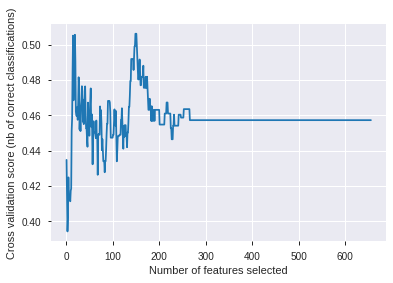

[ True  True  True  True  True False  True  True  True  True  True False
 False  True]
Index(['gender_TFV_Female', 'gender_TFV_Male', 'dementia_TFV_False',
       'dementia_TFV_True', 'smoker_TFV_no_smoker', 'smoker_TFV_smoker',
       'alcohol_TFV_extreme_drinking', 'alcohol_TFV_mild_drinking',
       'education_TFV_basic', 'education_TFV_higher', 'education_TFV_medium',
       'bmi', 'weight', 'apoe_TFV_E2E3'],
      dtype='object')
Index(['gender_TFV_Female', 'gender_TFV_Male', 'dementia_TFV_False',
       'dementia_TFV_True', 'smoker_TFV_no_smoker',
       'alcohol_TFV_extreme_drinking', 'alcohol_TFV_mild_drinking',
       'education_TFV_basic', 'education_TFV_higher', 'education_TFV_medium',
       'apoe_TFV_E2E3', 'apoe_TFV_E3E3', 'apoe_TFV_E3E4', 'apoe_TFV_E4E4'],
      dtype='object')


In [21]:
# RFECV

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X, y = data_p_i, target_p_i

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.savefig(result_path + 'RFECV_kerlinear', dpi=120, pad_inch=20)
plt.show()


# get important Feature List
important_feature_list = patient_df.columns[0:-2][rfecv.support_]
print (rfecv.support_[0:14])
print (patient_df.columns[0:14])
print (important_feature_list[0:14])

# <a id='06'>6.Machine Learning -Classification Model</a>

In [22]:
## Cross Validation Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import classification_report


X, y = data_p_s[:,rfecv.support_], target_p_s
print (X.shape, y.shape)
clf = RandomForestClassifier(n_estimators=100)
print (cross_validate(clf, X, y, scoring=['recall_macro', 'precision_macro', 'f1_macro', 'accuracy'], cv=5) )
y_pred = cross_val_predict(clf,X, y, cv=5 )
print(classification_report(y, y_pred))

(138, 149) (138,)


/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



{'fit_time': array([0.10471654, 0.12434506, 0.10208964, 0.11843991, 0.10668421]), 'score_time': array([0.02503753, 0.0328877 , 0.03290796, 0.02537465, 0.02812457]), 'test_recall_macro': array([0.45138889, 0.58333333, 0.57222222, 0.55416667, 0.62222222]), 'test_precision_macro': array([0.56984127, 0.5962963 , 0.71666667, 0.5537037 , 0.60912698]), 'test_f1_macro': array([0.46719002, 0.57485994, 0.58854294, 0.55085307, 0.61018519]), 'test_accuracy': array([0.51724138, 0.57142857, 0.53571429, 0.55555556, 0.57692308])}
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        15
           1       1.00      0.90      0.95        10
           2       0.57      0.54      0.55        24
           3       0.44      0.42      0.43        26
           4       0.62      0.65      0.64        23
           5       0.47      0.62      0.54        40

    accuracy                           0.54       138
   macro avg       0.56      0.53      0.54   

In [23]:
## Cross Validation SVC
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import classification_report


X, y = data_p_s[:,rfecv.support_], target_p_s
clf = svm.SVC(gamma='scale', random_state=0)
print (cross_validate(clf, X, y, scoring=['recall_macro', 'precision_macro', 'f1_macro', 'accuracy',], cv=5) )
y_pred = cross_val_predict(clf,X, y, cv=5 )
print(classification_report(y, y_pred, target_names=class_names_p))

{'fit_time': array([0.00930023, 0.00364113, 0.00359511, 0.00378656, 0.00387788]), 'score_time': array([0.00415897, 0.00391817, 0.00397754, 0.0040977 , 0.00372934]), 'test_recall_macro': array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]), 'test_precision_macro': array([0.04597701, 0.04761905, 0.04761905, 0.04938272, 0.05128205]), 'test_f1_macro': array([0.07207207, 0.07407407, 0.07407407, 0.07619048, 0.07843137]), 'test_accuracy': array([0.27586207, 0.28571429, 0.28571429, 0.2962963 , 0.30769231])}
              precision    recall  f1-score   support

        Slow       0.00      0.00      0.00        15
    Slow_MiS       0.00      0.00      0.00        10
      Normal       0.00      0.00      0.00        24
  Normal_MiS       0.00      0.00      0.00        26
        Fast       0.00      0.00      0.00        23
    Fast_MiS       0.29      1.00      0.45        40

    accuracy                           0.29       138
   macro avg       0.05      0.17      0.07   

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

/home/vya

In [24]:
# Grid Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#from fastai.imports import *
#from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import numpy as np 
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline 
pd.options.mode.chained_assignment = None


data_p_grid = data_p_s[:,rfecv.support_]

rf_param_grid = {
                 'max_depth' : [4, 6, 8,10],
                 'n_estimators': range(1,100),
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10,20],
                 'min_samples_leaf': [1, 3, 10,18],
                 'bootstrap': [True, False],
                 
                 }
m = RandomForestClassifier()
m_r = RandomizedSearchCV(param_distributions=rf_param_grid, 
                                    estimator = m, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 5)

m_r.fit(data_p_grid, target_p_s)

#m_r.fit(data_p, patient_df['patient_class_cat-Label'])

rf_bp = m_r.best_params_
print (rf_bp)

rf_classifier=RandomForestClassifier(n_estimators=rf_bp["n_estimators"],
                                     min_samples_split=rf_bp['min_samples_split'],
                                     min_samples_leaf=rf_bp['min_samples_leaf'],
                                     max_features=rf_bp['max_features'],
                                     max_depth=rf_bp['max_depth'],
                                     bootstrap=rf_bp['bootstrap'])

rf_classifier.fit(data_p_grid, target_p_s)


importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

#print (indices)
# Print the feature ranking
print("Feature ranking:")
fea_list = important_feature_list # taken from RFECV
for f in range(15):
    print("%d. feature: %s (%f)" % (f + 1, fea_list[indices[f]], importances[indices[f]]))

# plot randomForest
estimator_id = 1  #need to change
estimator = rf_classifier.estimators_[1]

feature_names = fea_list
target_p_s_cat = pd.Series(data=target_p_s).replace({i:j for i, j in enumerate(class_names_p)})
#y_train_str =  class_names_p 
#target_p_s.astype('str') #target_p_s_cat.astype('str')

export_graphviz(estimator, out_file=result_path+'tree.dot', 
                feature_names = feature_names,
                class_names = class_names_p,
                rounded = True, proportion = False, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', result_path+'tree.dot', '-o', result_path+'tree.png', '-Gdpi=600'])
call(['dot', '-Tpdf', result_path+'tree.dot', '-o', result_path+'tree.pdf', '-Gdpi=600'])

from IPython.display import Image
Image(filename = result_path+'tree.png')

/home/vyasa/pythonEnv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'n_estimators': 31, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
Feature ranking:
1. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild (0.119656)
2. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate (0.110881)
3. feature: Medication_cui_2_TFV_C0015772 (0.042187)
4. feature: Medication_cui_3_TFV_C0015772 (0.039105)
5. feature: Medication_cui_3_TFV_C0593906 (0.024774)
6. feature: Medication_cui_4_TFV_C0872895 (0.024036)
7. feature: Medication_cui_4_TFV_C0123091 (0.023519)
8. feature: Medication_cui_4_TFV_C0015772 (0.021681)
9. feature: Medication_cui_3_TFV_C0123091 (0.021567)
10. feature: Age_At_Episode_1 (0.021419)
11. feature: Age_At_Episode (0.021069)
12. feature: Medication_cui_3_TFV_C0105426 (0.019645)
13. feature: Age_At_Episode_2 (0.018973)
14. feature: Medication_cui_4_TFV_C0591154 (0.018307)
15. feature: Medication_cui_1_TFV_C2346927 (0.017563)


In [25]:
# For Data for particular patient

p = data_p_grid[0:2]
t = target_p_s[0:2]

print ('Mean Accuracy: ', rf_classifier.score(data_p_grid, target_p_s)*100)
print ('Predict Probability: ', rf_classifier.predict_proba(p)*100)
print ('Prediction: ', rf_classifier.predict(p))
print ('Target: ', t)

print('\n #########  Estimator ##################\n')
print ('Predict Probability Estimator', estimator.predict_proba(p)*100)
print ('Prediction Estimator: ', estimator.predict(p))
print ('Decision Path Estimator',estimator.decision_path(p).toarray())

importances = estimator.feature_importances_*100
print ('\nEstimator feature importance')
for f in range(15):
    print("%d. feature: %s (%f)" % (f + 1, fea_list[indices[f]], importances[indices[f]]))
    
def get_branch(clf, patient, target_names, estimator_id):
    branchs = []
    for j, tree in enumerate(clf.estimators_):
        #rule = static
        feature = tree.tree_.feature
        #print (feature)
        threshold = tree.tree_.threshold
        node_indicator = tree.decision_path(patient)
        #print ()
        # Similarly, we can also have the leaves ids reached by each sample.
        leave_id = tree.apply(patient)

        sample_id = 0
        node_index = node_indicator.indices[node_indicator.indptr[0]:
        node_indicator.indptr[1]]
        line = ''
        for node_id in node_index:
            #print (node_id)
            if leave_id[sample_id] == node_id:
                continue
            if (patient[sample_id][feature[node_id]] <= threshold[node_id]):
                threshold_sign = "<="
            else:
                threshold_sign = ">"
            line+= 'decision id node '+ str(node_id) + ':' + str(sample_id) + '( = )' + str(feature_names[feature[node_id]]) +') '+ str(patient[sample_id][feature[node_id]])+' '+str(threshold_sign) + " " + str(threshold[node_id])+'\n'
        #print (target_names[tree.predict(patient)[sample_id].astype('int32')])
        line+='classification: '+ str(target_names[tree.predict(patient)[sample_id].astype('int32')])
        branchs.append(line)
    return branchs[estimator_id]


print ('\n For Estimator: {} \n {}: '.format(estimator_id, get_branch(rf_classifier, p, class_names_p, estimator_id)))


Mean Accuracy:  73.18840579710145
Predict Probability:  [[23.11884979  0.16953917 48.819563   11.15221603  7.01714388  9.72268812]
 [ 1.36020666  0.23041475  9.24290309 11.09488789 15.6257713  62.44581631]]
Prediction:  [2 5]
Target:  [2 5]

 #########  Estimator ##################

Predict Probability Estimator [[30.          0.         60.          0.         10.          0.        ]
 [ 0.          0.          9.09090909 18.18181818  9.09090909 63.63636364]]
Prediction Estimator:  [2. 5.]
Decision Path Estimator [[1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]]

Estimator feature importance
1. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Mild (0.000000)
2. feature: CAMDEX SCORES: MINI MENTAL SCORE_CATEGORY_TFV_Moderate (42.125684)
3. feature: Medication_cui_2_TFV_C0015772 (18.913261)
4. feature: Medication_cui_3_TFV_C0015772 (0.000000)
5. feature: Medication_cui_3_TFV_C0593906 (0.000000)
6. feature: Medication